In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.io import output_notebook, show, curdoc, save
from bokeh.plotting import figure, output_file
from datetime import datetime as dt
output_notebook()
curdoc().theme = 'dark_minimal'

Loading BokehJS ...

In [43]:
# Cleanup
# Leer Spalten entfernen
# Leerzeichen aus den Spaltentitel um via . Notation an die Daten zu gelangen
# Datum / Uhrzeit und Datum Uhrzeit konvertieren

df = pd.read_csv(filepath_or_buffer='Data-Logger - sensor_1.csv', decimal=',',parse_dates=True)
df_1 = df.drop(columns=['Unnamed: 3','Unnamed: 9', 'Unnamed: 10', 'Ausensensor'])

df_2 = df_1.rename(columns={x:str.replace(x," ", "") for x in df_1.keys()})
dtm = lambda x: dt.strptime(x, '%d.%m.%Y %H:%M:%S')
df_2["DateTime"] = df_2.Timestamp.apply(dtm)
df_2

,Timestamp,Luftfeuchtigkeit,KabelThermometer,TemperaturSensor2,Luftdruckrelativ,Luftdruckabsolut,lux,RSSI,DateTime
0,04.12.2023 07:41:17,83.2,-3.44,-2.24,976.01,1010.14,0.00,-53,2023-12-04 07:41:17
1,04.12.2023 08:09:33,83.5,-3.31,-2.20,975.72,1009.83,7.13,-53,2023-12-04 08:09:33
2,04.12.2023 08:37:46,82.8,-3.06,-1.80,975.91,1010.03,20.00,-53,2023-12-04 08:37:46
3,04.12.2023 09:06:03,82.1,-2.19,-0.95,975.51,1009.62,286.67,-53,2023-12-04 09:06:03
4,04.12.2023 09:34:26,80.4,-1.69,-0.08,975.24,1009.35,270.00,-53,2023-12-04 09:34:26
...,...,...,...,...,...,...,...,...,...
1224,28.12.2023 09:25:26,89.5,7.75,8.30,981.27,1015.58,71.67,-53,2023-12-28 09:25:26
1225,28.12.2023 09:53:44,89.0,7.81,8.34,981.59,1015.92,45.00,-55,2023-12-28 09:53:44
1226,28.12.2023 10:22:04,89.0,7.94,8.50,981.80,1016.13,51.67,-54,2023-12-28 10:22:04
1227,28.12.2023 10:50:24,88.7,8.38,9.10,981.66,1015.98,300.00,-54,2023-12-28 10:50:24


In [15]:
# Temperturen Plot
p = figure(title='Temperaturen', x_axis_label='x', y_axis_label='y',x_axis_type='datetime', width=900, height=400)

p.line(df_2.DateTime, df_2.TemperaturSensor2, legend_label='Thermometer Sensor 1', line_width=2, line_color='red')
p.line(df_2.DateTime, df_2.KabelThermometer, legend_label='Thermometer Kabel', line_width=2, line_color='green')

show(p) # show the results
# und als html speicherni
output_file(filename="tempplot.html", title="Temperaturen")
save(p)

'b:\\Data\\Dev\\datapy\\tempplot.html'

In [4]:
# RSSI
p = figure(width=1200, height=400, title='RSSI Verteilung')
p.circle(df_2.DateTime, df_2.RSSI, size=10,fill_color="green" )
p.square(df_2.DateTime, df_2.KabelThermometer, size=10, fill_color="yellow")
show(p)

<Axes: >

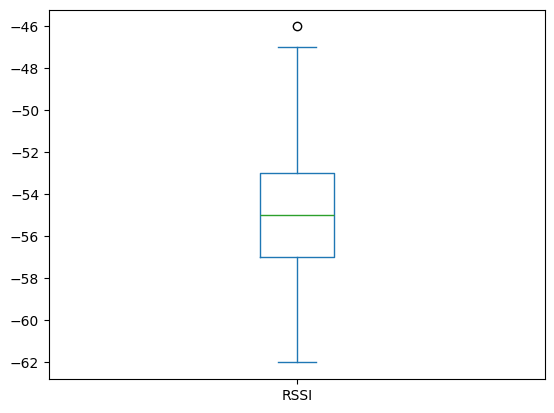

In [16]:
df_2.RSSI.plot.box()

<Axes: >

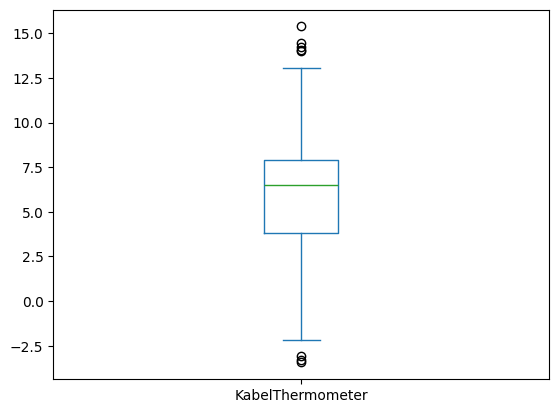

In [16]:
df_2.KabelThermometer.plot.box()

<Axes: ylabel='Frequency'>

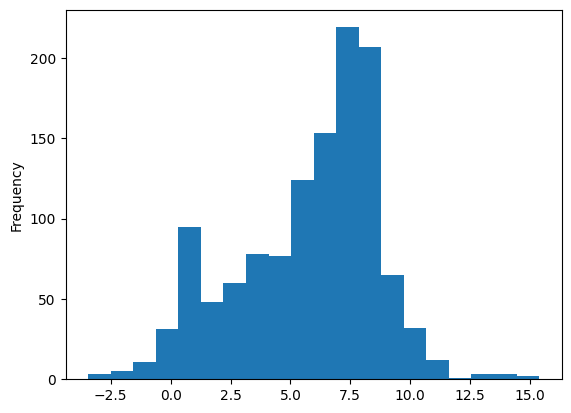

In [18]:
df_2.KabelThermometer.plot.hist(bins=20)

<Axes: ylabel='Density'>

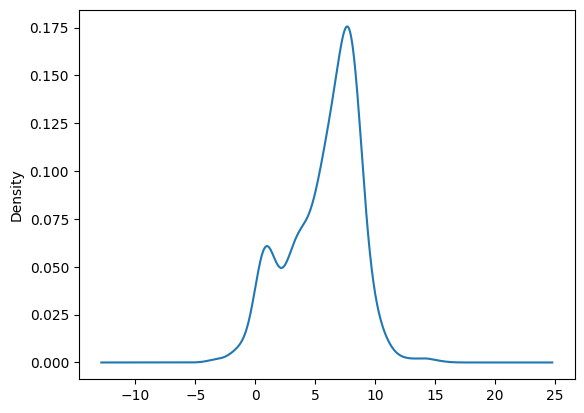

In [19]:
df_2.KabelThermometer.plot.kde()

<Axes: ylabel='Density'>

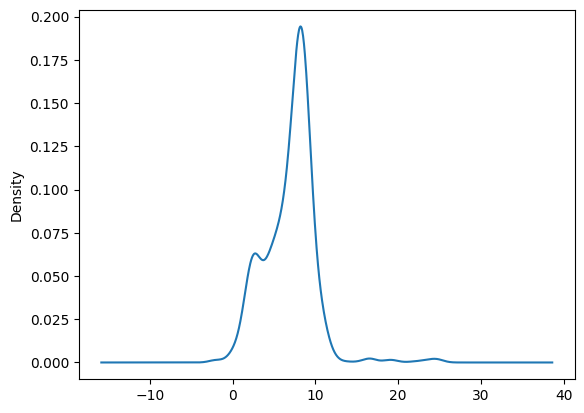

In [20]:
df_2.TemperaturSensor2.plot.kde()

<Axes: xlabel='TemperaturSensor2', ylabel='KabelThermometer'>

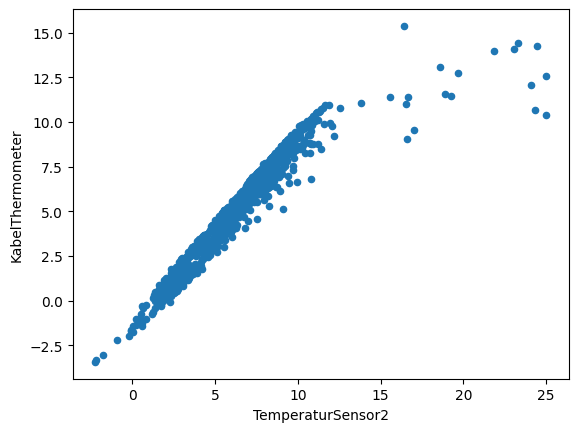

In [22]:
df_2.plot(kind='scatter', x='TemperaturSensor2', y='KabelThermometer')

<Axes: xlabel='TemperaturSensor2', ylabel='KabelThermometer'>

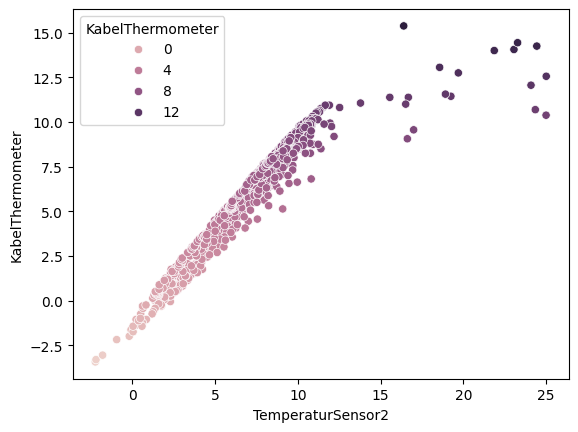

In [24]:
import seaborn as sns

sns.scatterplot(x='TemperaturSensor2', y='KabelThermometer', data=df_2, hue='KabelThermometer')

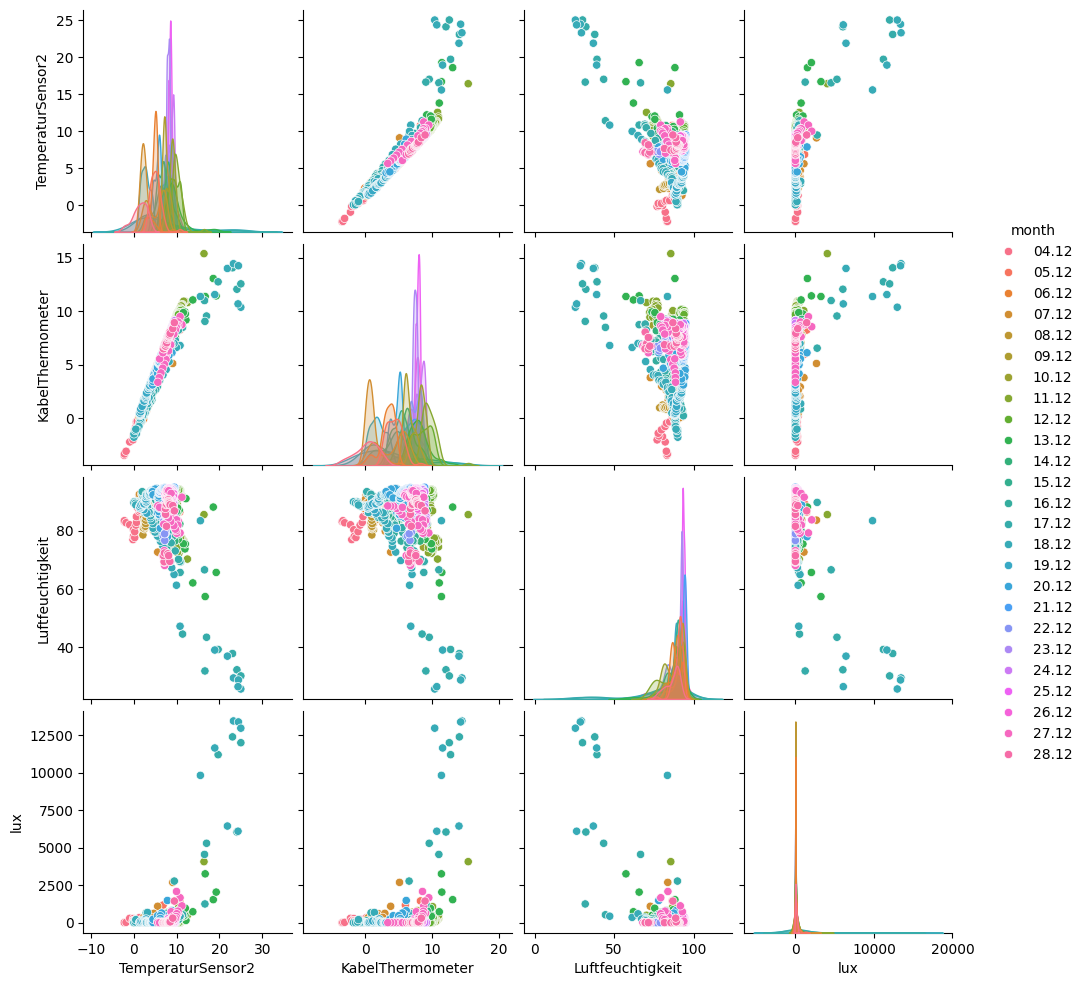

In [44]:
dtm = lambda x: x[0:5]
df_2["month"] = df_2.Timestamp.apply(dtm)
df_2
sns.pairplot(data=df_2, vars=['TemperaturSensor2', 'KabelThermometer', 'Luftfeuchtigkeit','lux' ], hue='month')

In [45]:
df_2[['TemperaturSensor2', 'KabelThermometer', 'Luftfeuchtigkeit','lux' ]].dropna().corr()

,TemperaturSensor2,KabelThermometer,Luftfeuchtigkeit,lux
TemperaturSensor2,1.000000,0.935028,-0.422863,0.522223
KabelThermometer,0.935028,1.000000,-0.183226,0.265220
Luftfeuchtigkeit,-0.422863,-0.183226,1.000000,-0.647780
lux,0.522223,0.265220,-0.647780,1.000000


<Axes: >

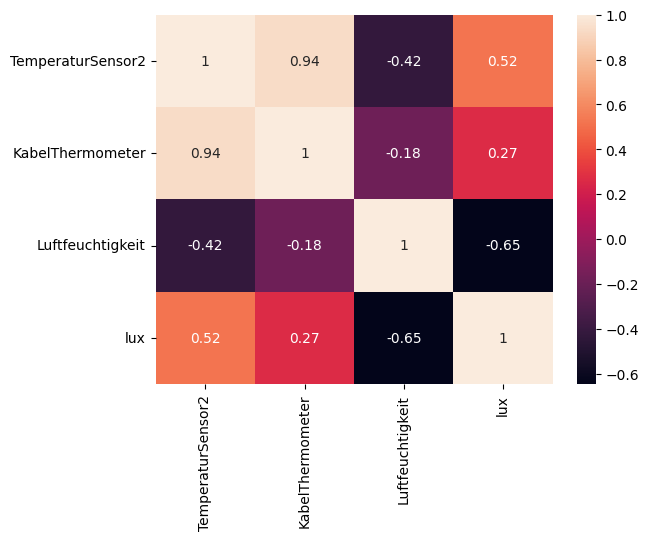

In [46]:
sns.heatmap(df_2[['TemperaturSensor2', 'KabelThermometer', 'Luftfeuchtigkeit','lux' ]].dropna().corr(), annot=True)

In [54]:
# Daten mit Feather speichern

df_2.to_pickle(path='data.pickle.zip', compression='infer')
df_2.to_feather(path='data.feather')

In [5]:
df_2.KabelThermometer.quantile([0.25,0.50,0.75,0.95])

0.25    3.81
0.50    6.50
0.75    7.88
0.95    9.44
Name: KabelThermometer, dtype: float64

In [10]:
df_2.KabelThermometer.describe()

count    1229.00000
mean        5.77847
std         2.91409
min        -3.44000
25%         3.81000
50%         6.50000
75%         7.88000
max        15.38000
Name: KabelThermometer, dtype: float64

In [11]:
df_2.RSSI.quantile([0.1,0.25,0.50,0.75,0.95])

0.10   -58.0
0.25   -57.0
0.50   -55.0
0.75   -53.0
0.95   -51.0
Name: RSSI, dtype: float64

In [3]:
# Hexenkulte

janein = lambda x : True if x.lower() == 'ja' else False

hexen = pd.read_csv(filepath_or_buffer='hexenkulte.csv', converters={'Tieropfer': janein, 'Ziegen': janein, 'Menschenopfer': janein}, sep=';')

hexen_2 = hexen.rename(columns={x:str.replace(x," ", "") for x in hexen.keys()})

hexen_2


,Hexenkult,Eigenschaften,MöglicheQuellen,ErstmaligeErscheinungalsJahr,Ausrichtung,Tieropfer,Ziegen,Menschenopfer,Mitgliedergeschätzt,Vorkommen
0,Sabbat der Hexen,"Schwarze Magie, rituelle Tänze, Sabbatfeiern","Hexenhammer von Heinrich Kramer, ""Hexenjagd"" v...",15. Jahrhundert,Böse,True,True,True,1000,Europa
1,Zirkel der Natur,"Naturmagie, Druidenrituale, Verehrung von Elem...",Die Nebel von Avalon von Marion Zimmer Bradley...,1983,Gut,False,False,False,500,"Europa, Nordamerika"
2,Orden der Schatten,"Dunkle Rituale, Blutmagie, Pakt mit Dämonen",Der Hexer von Andrzej Sapkowski (The Witcher-R...,1993,Böse,True,False,True,300,"Europa, Osteuropa"
3,Luna's Anhänger,"Mondmagie, hellseherische Fähigkeiten, Mysterien","Practical Magic von Alice Hoffman, ""Luna: New ...",1995,Gut,False,False,False,200,"Europa, Nordamerika"
4,Kult des Verborgenen Auges,"Okkulte Geheimnisse, Beschwörungen, Anbetung d...","Der Name des Windes von Patrick Rothfuss, ""Die...",2007,Gut,False,False,True,150,"Europa, Nordamerika"
5,Pennywise-Kult,"Angstmanipulation, Gestaltwandel, Opfergaben",Es von Stephen King,1986,Böse,True,False,True,500,Nordamerika
6,Kult der Cyberschleier,"Digitale Magie, Hacker-Rituale, Verehrung von ...","Neuromancer von William Gibson, ""Snow Crash"" v...",1984,Böse,False,False,False,1000,"Weltweit, insbesondere Nordamerika, Asien"
7,Logarithmische Illuminati,"Geheime Verschwörungen, Algorithmische Mysterien","Cryptonomicon von Neal Stephenson, ""Daemon"" vo...",1999,Böse,False,False,True,300,Weltweit
8,Cyber-Schattenzirkel,"Hacking-Rituale, Anbetung von künstlicher Inte...","Matrix (Film), ""Daemon"" von Daniel Suarez",1999,Böse,False,False,False,200,Weltweit
9,Firewall-Hexenorden,"Schutzzauber für Netzwerke, digitale Verteidig...",Science-Fiction-Literatur im Bereich künstlich...,2010,Gut,False,False,False,150,Weltweit


In [18]:
ganzueble = hexen_2[(hexen_2.Menschenopfer==True) & (hexen_2.Ziegen==True)][['Hexenkult','Menschenopfer','Ziegen']] 
ganzueble

,Hexenkult,Menschenopfer,Ziegen
0,Sabbat der Hexen,True,True
12,Dämonenpakt-Orden,True,True
26,Flammenherz-Orden,True,True


In [5]:
hexen_2['len'] = hexen_2.Vorkommen.apply(lambda x: x.split(','))
hexen_2

,Hexenkult,Eigenschaften,MöglicheQuellen,ErstmaligeErscheinungalsJahr,Ausrichtung,Tieropfer,Ziegen,Menschenopfer,Mitgliedergeschätzt,Vorkommen,len
0,Sabbat der Hexen,"Schwarze Magie, rituelle Tänze, Sabbatfeiern","Hexenhammer von Heinrich Kramer, ""Hexenjagd"" v...",15. Jahrhundert,Böse,True,True,True,1000,Europa,[Europa]
1,Zirkel der Natur,"Naturmagie, Druidenrituale, Verehrung von Elem...",Die Nebel von Avalon von Marion Zimmer Bradley...,1983,Gut,False,False,False,500,"Europa, Nordamerika","[Europa, Nordamerika]"
2,Orden der Schatten,"Dunkle Rituale, Blutmagie, Pakt mit Dämonen",Der Hexer von Andrzej Sapkowski (The Witcher-R...,1993,Böse,True,False,True,300,"Europa, Osteuropa","[Europa, Osteuropa]"
3,Luna's Anhänger,"Mondmagie, hellseherische Fähigkeiten, Mysterien","Practical Magic von Alice Hoffman, ""Luna: New ...",1995,Gut,False,False,False,200,"Europa, Nordamerika","[Europa, Nordamerika]"
4,Kult des Verborgenen Auges,"Okkulte Geheimnisse, Beschwörungen, Anbetung d...","Der Name des Windes von Patrick Rothfuss, ""Die...",2007,Gut,False,False,True,150,"Europa, Nordamerika","[Europa, Nordamerika]"
5,Pennywise-Kult,"Angstmanipulation, Gestaltwandel, Opfergaben",Es von Stephen King,1986,Böse,True,False,True,500,Nordamerika,[Nordamerika]
6,Kult der Cyberschleier,"Digitale Magie, Hacker-Rituale, Verehrung von ...","Neuromancer von William Gibson, ""Snow Crash"" v...",1984,Böse,False,False,False,1000,"Weltweit, insbesondere Nordamerika, Asien","[Weltweit, insbesondere Nordamerika, Asien]"
7,Logarithmische Illuminati,"Geheime Verschwörungen, Algorithmische Mysterien","Cryptonomicon von Neal Stephenson, ""Daemon"" vo...",1999,Böse,False,False,True,300,Weltweit,[Weltweit]
8,Cyber-Schattenzirkel,"Hacking-Rituale, Anbetung von künstlicher Inte...","Matrix (Film), ""Daemon"" von Daniel Suarez",1999,Böse,False,False,False,200,Weltweit,[Weltweit]
9,Firewall-Hexenorden,"Schutzzauber für Netzwerke, digitale Verteidig...",Science-Fiction-Literatur im Bereich künstlich...,2010,Gut,False,False,False,150,Weltweit,[Weltweit]


<Axes: title={'center': 'Mitglieder'}, xlabel='Hexenkult'>

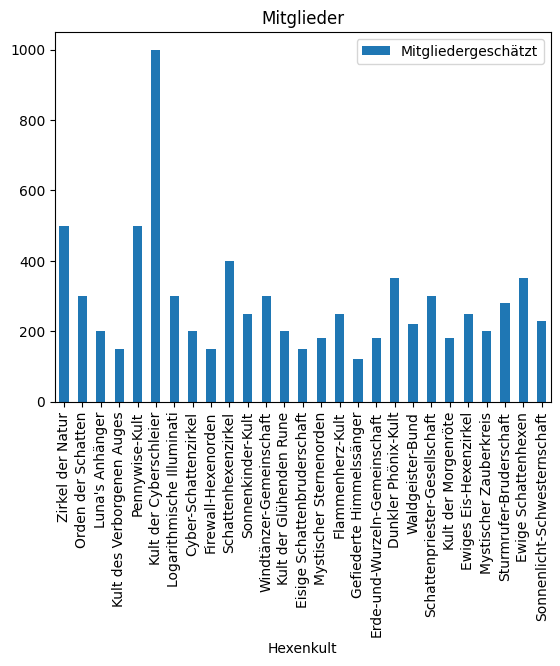

In [14]:
ziegen = hexen_2[hexen_2.Ziegen == False]
len(ziegen)

ziegen.plot.bar(title='Mitglieder', x='Hexenkult')

<Axes: title={'center': 'Mitgleiderverteilung'}, ylabel='Frequency'>

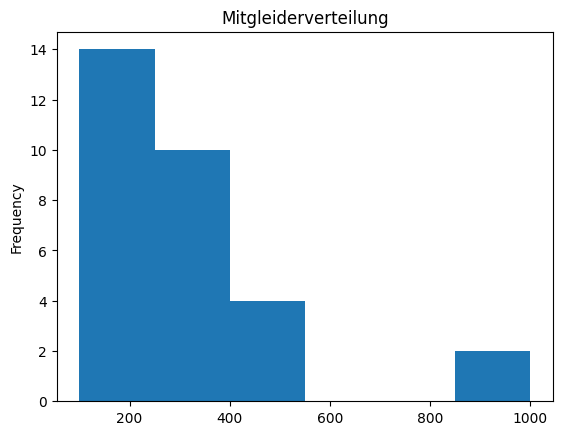

In [10]:
hexen_2['Mitgliedergeschätzt'].plot(kind='hist', bins=6, title='Mitgleiderverteilung')

<Axes: title={'center': 'Mitgleiderverteilung'}, ylabel='Density'>

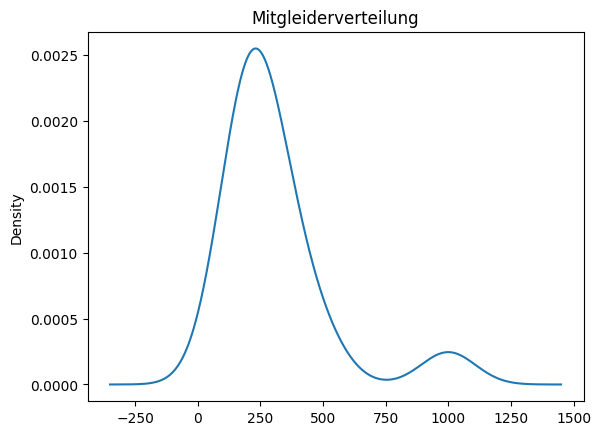

In [12]:
hexen_2['Mitgliedergeschätzt'].plot(kind='kde', title='Mitgleiderverteilung')

<Axes: xlabel='len'>

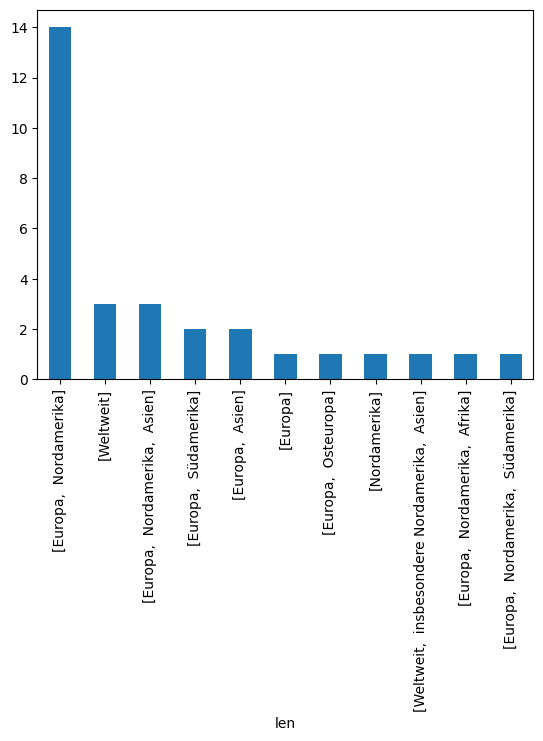

In [8]:
hexen_2.len.value_counts().plot(kind='bar')

In [14]:
def deco(fnc):
    def wrapped(*args, **kwargs):

        fnc(*args, **kwargs)
        print('A:', args)
        print('K:', kwargs)
    return wrapped
    
@deco    
def prt(text, pa):
    print("-----")
    print(text)
    
prt('tat', 'tes' )

-----
tat
A: ('tat', 'tes')
K: {}


In [20]:
data = {'A': [1, 2, 3, 4],
        'B': [5, 6, 7, 8],
        'C': [9, 10, 11, 12],
        'D': [13, 14, 15, 16]}

df = pd.DataFrame(data)

# Hierarchie in den Spalten erstellen
df.columns = pd.MultiIndex.from_tuples([('Group1', 'A'), ('Group1', 'B'), ('Group2', 'C'), ('Group2', 'D')])

# DataFrame mit Hierarchie anzeigen
df

Group1    Group2    
       A  B      C   D
0      1  5      9  13
1      2  6     10  14
2      3  7     11  15
3      4  8     12  16